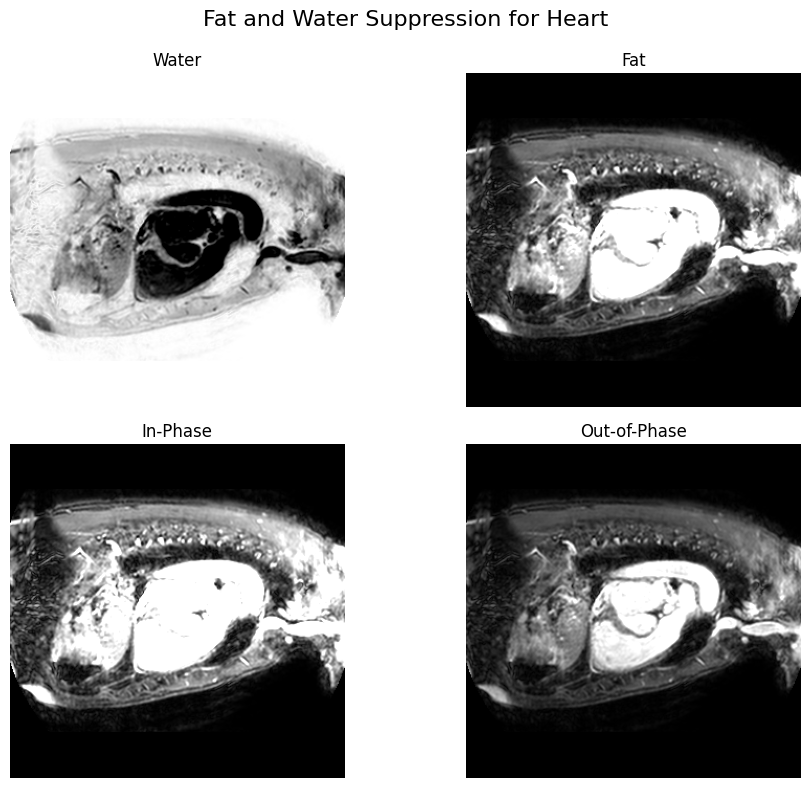

In [7]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import exposure

# Load the .nii file
file_path = "F:/projects 1st/imaging/heart/imagesTr/la_011.nii"
img = nib.load(file_path)
img_data = img.get_fdata()

# Select a specific slice (change index as needed for a clear heart view)
slice_index = img_data.shape[2] // 2  # Middle slice as an example
slice_data = img_data[:, :, slice_index]

# Function to simulate suppression effects by adjusting contrast
def simulate_suppression(image, mode="water"):
    if mode == "water":
        return 1 - exposure.rescale_intensity(image, in_range=(np.percentile(image,10), np.percentile(image, 95)))
    elif mode == "fat":
        return exposure.rescale_intensity(image, in_range=(np.percentile(image,0), np.percentile(image, 90)))
    return image

# Simulate water and fat suppression
water_suppression = simulate_suppression(slice_data, mode="water")
fat_suppression = simulate_suppression(slice_data, mode="fat")

# Create in-phase and out-of-phase (for demonstration, just different contrast adjustments)
in_phase = water_suppression + fat_suppression
in_phase = exposure.rescale_intensity(slice_data, in_range=(np.percentile(slice_data, 5), np.percentile(slice_data, 85)))
out_of_phase = water_suppression - fat_suppression
out_of_phase = exposure.rescale_intensity(slice_data, in_range=(np.percentile(slice_data, 10), np.percentile(slice_data, 95)))

# Apply Gaussian filtering to reduce noise
filtered_in_phase = gaussian_filter(in_phase, sigma=1)
filtered_out_of_phase = gaussian_filter(out_of_phase, sigma=1)

# # Compute combined and difference images
# combined_image = filtered_in_phase + filtered_out_of_phase
# combined_image = exposure.rescale_intensity(combined_image, in_range=(np.percentile(combined_image, 5), np.percentile(combined_image, 95)))

# difference_image = filtered_in_phase - filtered_out_of_phase
# difference_image = exposure.rescale_intensity(difference_image, in_range=(np.percentile(difference_image, 5), np.percentile(difference_image, 95)))

# Display the images
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Fat and Water Suppression for Heart", fontsize=16)

axes[0, 0].imshow(water_suppression, cmap="gray")
axes[0, 0].set_title("Water")
axes[0, 0].axis("off")

axes[0, 1].imshow(fat_suppression, cmap="gray")
axes[0, 1].set_title("Fat")
axes[0, 1].axis("off")

axes[1, 0].imshow(in_phase, cmap="gray")
axes[1, 0].set_title("In-Phase")
axes[1, 0].axis("off")

axes[1, 1].imshow(out_of_phase, cmap="gray")
axes[1, 1].set_title("Out-of-Phase")
axes[1, 1].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()